# T1 - MC920
> Natan Beltrão da Cunha Pevidor Carvalho - 184972



## Shuffle Image

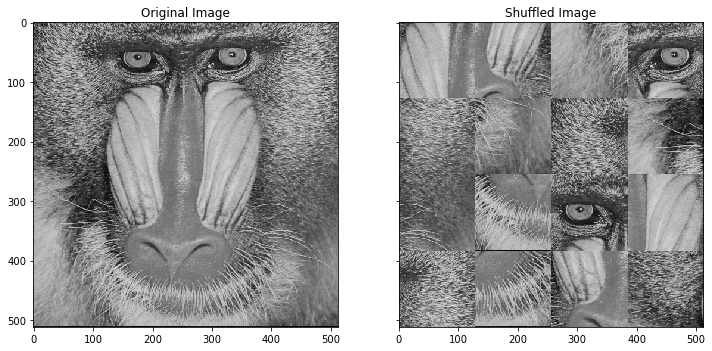

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

img = plt.imread('./images/in/baboon.png') * 255

figure, axis = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 8))
axis[0].set_title('Original Image')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)

# shuffle image blocks
newOrder = [6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5]
shuffledimg = np.zeros(img.shape)

# returns coordinates to a block from image split in 16
def get_block(img, block):
  height, length = img.shape
  vinc, hinc = (height / 4, length / 4)
  y = int((hinc * block) // length)
  x = block - (4 * y)
  return (round(y * vinc), round((y + 1) * vinc), round(x * hinc), round((x + 1) * hinc))

for i in range(16):
  sy, syf, sx, sxf = get_block(shuffledimg, i)
  y, yf, x, xf = get_block(img, newOrder[i] - 1)
  shuffledimg[sy:syf,sx:sxf] += img[y:yf,x:xf]

axis[1].set_title('Shuffled Image')
axis[1].imshow(shuffledimg, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/shuffledimage.png', shuffledimg.astype(np.uint8))

plt.show()

## Image Combination

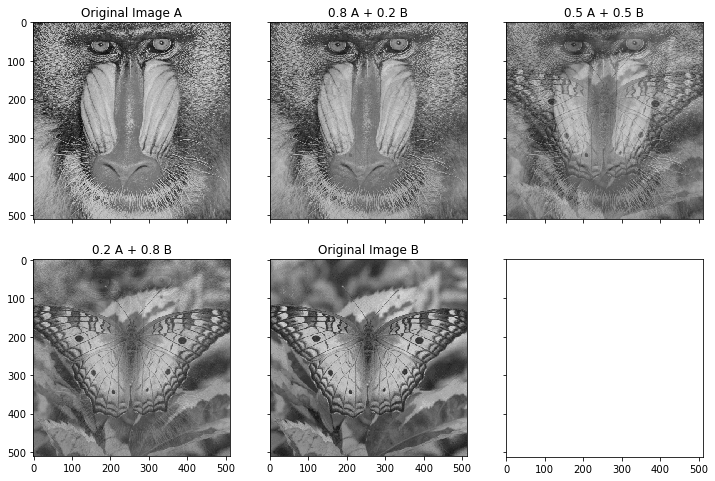

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

imga = plt.imread('./images/in/baboon.png') * 255
imgb = plt.imread('./images/in/butterfly.png') * 255

# combining images with differente percentages
comboimga = .8 * imga + .2 * imgb
comboimgb = .5 * imga + .5 * imgb
comboimgc = .2 * imga + .8 * imgb

figure, axis = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
axis[0,0].set_title('Original Image A')
axis[0,0].imshow(imga, cmap='gray', vmin=0, vmax=255)
axis[0,1].set_title('0.8 A + 0.2 B')
axis[0,1].imshow(comboimga, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/comboa.png', comboimga.astype(np.uint8))
axis[0,2].set_title('0.5 A + 0.5 B')
axis[0,2].imshow(comboimgb, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/combob.png', comboimgb.astype(np.uint8))
axis[1,0].set_title('0.2 A + 0.8 B')
axis[1,0].imshow(comboimgc, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/comboc.png', comboimgc.astype(np.uint8))
axis[1,1].set_title('Original Image B')
axis[1,1].imshow(imgb, cmap='gray', vmin=0, vmax=255)
plt.show()

## Intensity Transformation

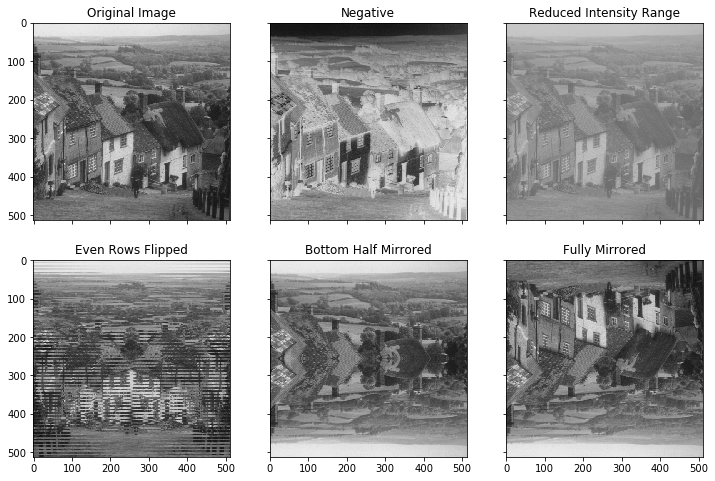

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import imageio

img = plt.imread('./images/in/city.png') * 255

# negative is the reverse of values in image
negative = 255 - img

# changing scale to 100-200
reducedscale = ((img - img.min()) / (img.max() - img.min())) * 100 + 100

# fliping even rows of image
evenflip = np.copy(img)
for i in range(0, img.shape[0], 2):
    evenflip[i] = np.flip(evenflip[i])

# mirroring image bottom half
mirroredhalf = np.copy(img)
half = img.shape[0]/2
mirroredhalf[math.ceil(half):] = img[math.floor(half)-1::-1]

# fully mirroring image
mirroredfull = img[::-1]

figure, axis = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
axis[0,0].set_title('Original Image')
axis[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[0,1].set_title('Negative')
axis[0,1].imshow(negative, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/negative.png', negative.astype(np.uint8))
axis[0,2].set_title('Reduced Intensity Range')
axis[0,2].imshow(reducedscale, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/reducedscale.png', reducedscale.astype(np.uint8))
axis[1,0].set_title('Even Rows Flipped')
axis[1,0].imshow(evenflip, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/evenflip.png', evenflip.astype(np.uint8))
axis[1,1].set_title('Bottom Half Mirrored')
axis[1,1].imshow(mirroredhalf, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/mirroredhalf.png', mirroredhalf.astype(np.uint8))
axis[1,2].set_title('Fully Mirrored')
axis[1,2].imshow(mirroredfull, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/mirroredfull.png', mirroredfull.astype(np.uint8))
plt.show()

## Colorful Images

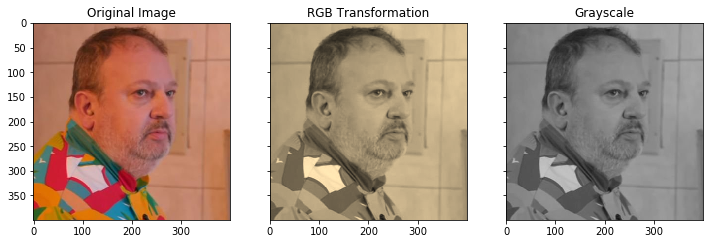

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# clipping alpha values out to obtain rgb values only
img = plt.imread('./images/in/jacquin.png')[:,:,:3] * 255

# calculating rgb values based on original values
rgbtransformation = np.empty(img.shape)
rgbtransformation[:,:,0] = 0.393*img[:,:,0] + 0.769*img[:,:,1] + 0.189*img[:,:,2]
rgbtransformation[:,:,1] = 0.349*img[:,:,0] + 0.686*img[:,:,1] + 0.168*img[:,:,2]
rgbtransformation[:,:,2] = 0.272*img[:,:,0] + 0.534*img[:,:,1] + 0.131*img[:,:,2]
rgbtransformation = np.clip(rgbtransformation, 0, 255)

# calculating one dimensional values for grayscale version based on original values
grayscale = 0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]
grayscale = np.clip(grayscale, 0, 255)

figure, axis = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 8))
axis[0].set_title('Original Image')
axis[0].imshow(img.astype(np.uint8))
axis[1].set_title('RGB Transformation')
axis[1].imshow(rgbtransformation.astype(np.uint8))
imageio.imsave('images/out/rgbtransformation.png', rgbtransformation.astype(np.uint8))
axis[2].set_title('Grayscale')
axis[2].imshow(grayscale, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/grayscale.png', grayscale.astype(np.uint8))
plt.show()

## Brightness

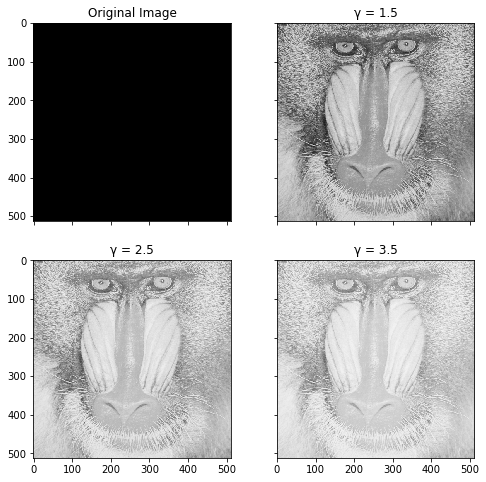

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

img = plt.imread('./images/in/baboon.png')

# brightening image by reducing values from original in exponential function
def brighten(i, g):
    return img ** (1/g)

brightness1_5 = brighten(img, 1.5) * 255
brightness2_5 = brighten(img, 2.5) * 255
brightness3_5 = brighten(img, 3.5) * 255

figure, axis = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
axis[0,0].set_title('Original Image')
axis[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[0,1].set_title('γ = 1.5')
axis[0,1].imshow(brightness1_5, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/brightness1_5.png', brightness1_5.astype(np.uint8))
axis[1,0].set_title('γ = 2.5')
axis[1,0].imshow(brightness2_5, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/brightness2_5.png', brightness2_5.astype(np.uint8))
axis[1,1].set_title('γ = 3.5')
axis[1,1].imshow(brightness3_5, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/brightness3_5.png', brightness3_5.astype(np.uint8))
plt.show()

## Image Quantization

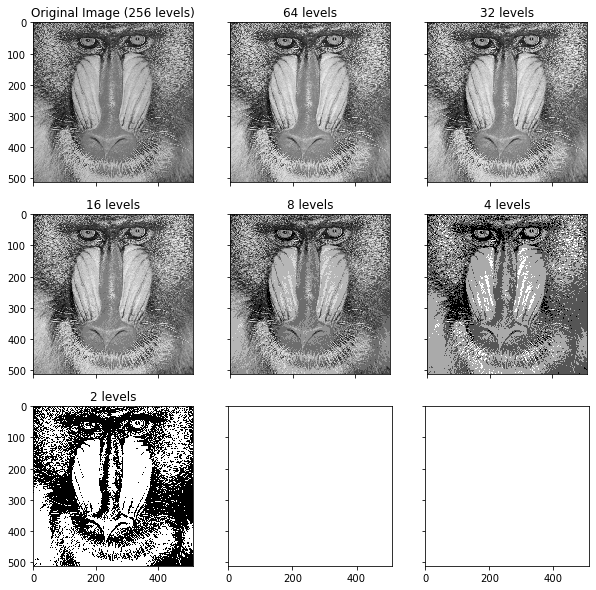

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

img = plt.imread('./images/in/baboon.png') * 255

# divide image into less values and converting to integer to reduce number of values
def quantization(img, new, original=256):
    temp = np.floor(img / (original // new)) * (original // new)
    return temp * (255 / temp.max())

quantization64 = quantization(img, 64)
quantization32 = quantization(img, 32)
quantization16 = quantization(img, 16)
quantization8 = quantization(img, 8)
quantization4 = quantization(img, 4)
quantization2 = quantization(img, 2)

figure, axis = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
axis[0,0].set_title('Original Image (256 levels)')
axis[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[0,1].set_title('64 levels')
axis[0,1].imshow(quantization64, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization64.png', quantization64.astype(np.uint8))
axis[0,2].set_title('32 levels')
axis[0,2].imshow(quantization32, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization32.png', quantization32.astype(np.uint8))
axis[1,0].set_title('16 levels')
axis[1,0].imshow(quantization16, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization16.png', quantization16.astype(np.uint8))
axis[1,1].set_title('8 levels')
axis[1,1].imshow(quantization8, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization8.png', quantization8.astype(np.uint8))
axis[1,2].set_title('4 levels')
axis[1,2].imshow(quantization4, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization4.png', quantization4.astype(np.uint8))
axis[2,0].set_title('2 levels')
axis[2,0].imshow(quantization2, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/quantization2.png', quantization2.astype(np.uint8))
plt.show()

## Bit planes

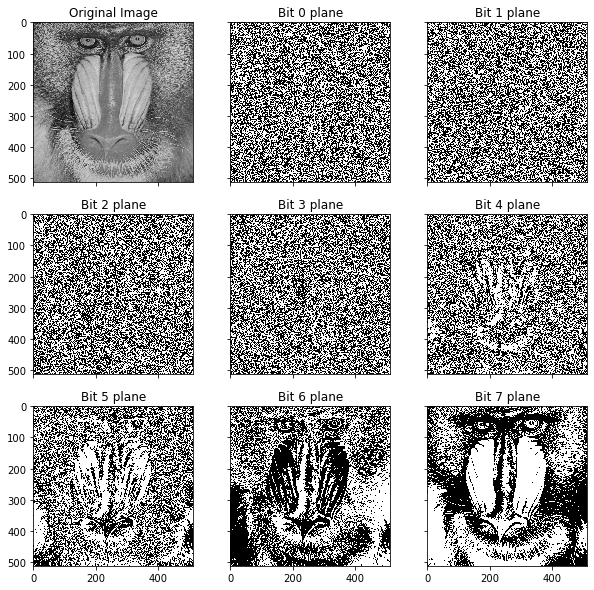

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

img = plt.imread('./images/in/baboon.png') * 255

# bit plane is obtained by decomposing number into powers of 2
def getbitplane(img, plane):
    bitplane = np.copy(img)
    for i in range(plane):
        bitplane = bitplane // 2
    return bitplane % 2 * 255

figure, axis = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
axis[0,0].set_title('Original Image')
axis[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
for i in range(8):
    y = (i + 1) // 3
    x = (i + 1) % 3
    axis[y,x].set_title(f'Bit {i} plane')
    bitplane = getbitplane(img, i)
    axis[y,x].imshow(bitplane, cmap='gray', vmin=0, vmax=255)
    imageio.imsave(f'images/out/bit{i}.png', bitplane.astype(np.uint8))
plt.show()

## Filters

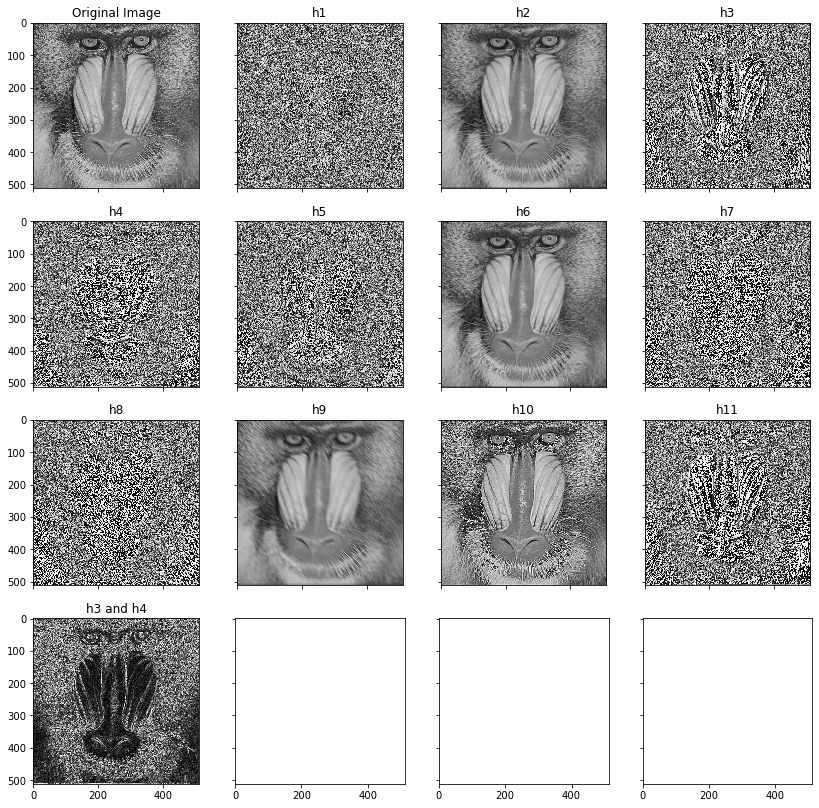

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import imageio

img = plt.imread('./images/in/baboon.png') * 255

# adding filters to be applied into a list
h = []
h.append(np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]]))
h.append((1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]))
h.append(np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
h.append(np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
h.append(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
h.append((1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]]))
h.append(np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]]))
h.append(np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]]))
h.append((1/9)*np.array([[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]]))
h.append((1/8)*np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]]))
h.append(np.array([[-1,-1,0],[-1,0,1],[0,1,1]]))

figure, axis = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(14, 14))
axis[0,0].set_title('Original Image')
axis[0,0].imshow(img.astype(np.uint8), cmap='gray', vmin=0, vmax=255)

# applying filters by convolving procedure
for i in range(len(h)):
    y = (i + 1) // 4
    x = (i + 1) % 4
    axis[y,x].set_title(f'h{i+1}')
    filtered = signal.convolve2d(img, h[i], boundary='symm', mode='same').astype(np.uint8)
    axis[y,x].imshow(filtered, cmap='gray', vmin=0, vmax=255)
    imageio.imsave(f'images/out/h{i+1}.png', filtered)

# combining filters h3 and h4
h3_applied = signal.convolve2d(img, h[2], boundary='symm', mode='same')
h4_applied = signal.convolve2d(img, h[3], boundary='symm', mode='same')
result = ((h3_applied**2 + h4_applied**2)**(1/2)).astype(np.uint8)
axis[3, 0].set_title('h3 and h4')
axis[3, 0].imshow(result, cmap='gray', vmin=0, vmax=255)
imageio.imsave(f'images/out/h3_4.png', result)
plt.show()